# Fetch and Load the Dataset

## Fetch the Dataset Using Kaggle API

In [95]:
!pip install -q kaggle

In [96]:
# from google.colab import files
# files.upload()

In [97]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [98]:
import kaggle
dataset_dir = 'jillanisofttech/market-segmentation-in-insurance-unsupervised'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_dir, path ='.', unzip= True)

Dataset URL: https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised


## Load the Data into Pandas DataFrame

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('/content/Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Take a Quick Glance of the Data

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [102]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [103]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


# Explore and Visualized the Data

How does each features correlate with each other?

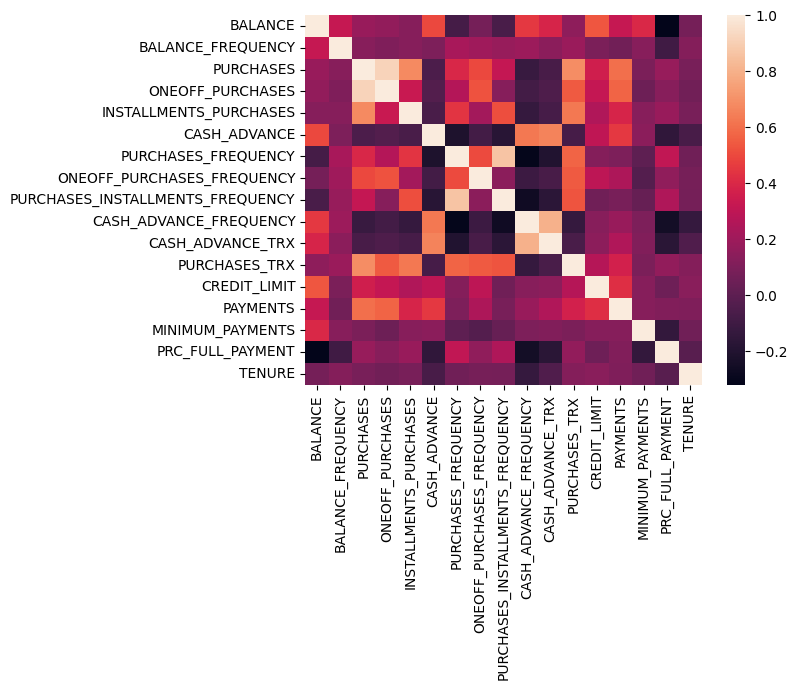

In [104]:
sns.heatmap(df.corr(numeric_only=True))
plt.savefig("Feature Correlation.jpg")

How is the distribution of each of the features?

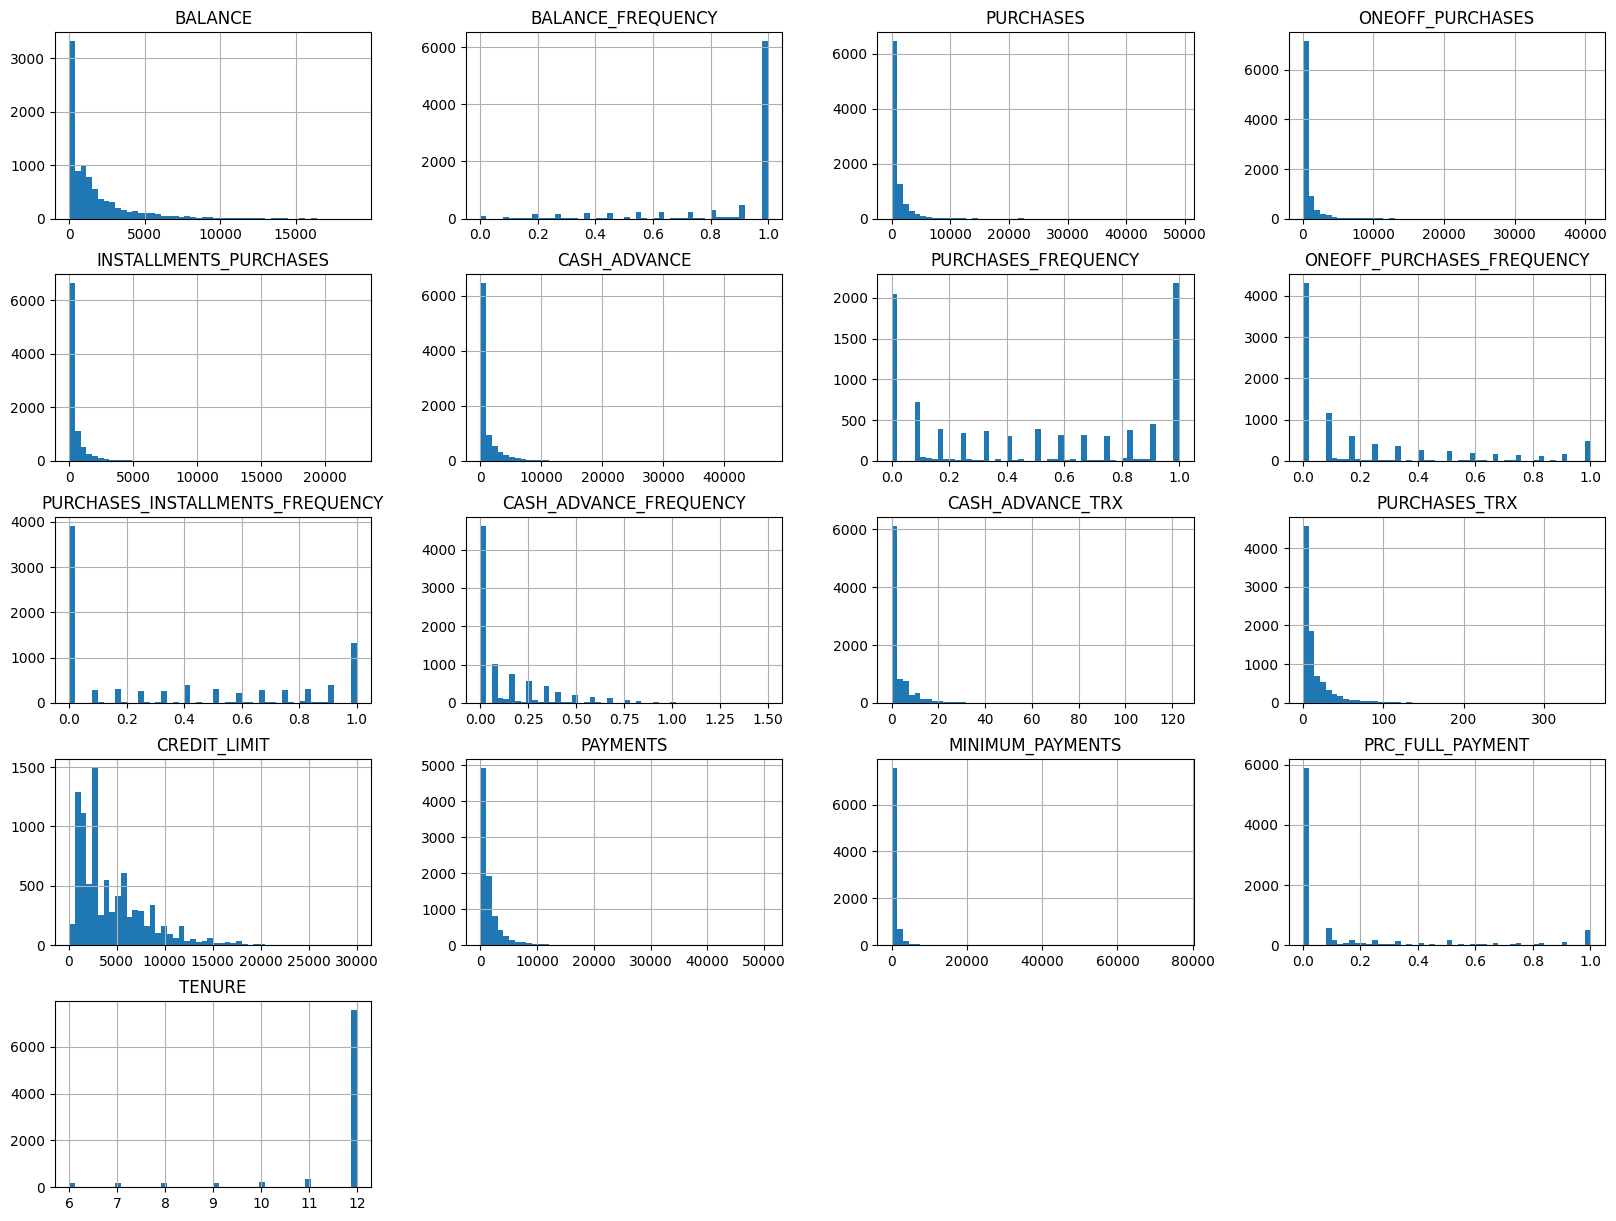

<Figure size 640x480 with 0 Axes>

In [105]:
df.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('Distribution of each features.jpg')

Determine the skewness of the data. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [106]:
df.skew(numeric_only=True)

,0
BALANCE,2.393386
BALANCE_FREQUENCY,-2.023266
PURCHASES,8.144269
ONEOFF_PURCHASES,10.045083
INSTALLMENTS_PURCHASES,7.299120
CASH_ADVANCE,5.166609
PURCHASES_FREQUENCY,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201
CASH_ADVANCE_FREQUENCY,1.828686


# Data Preparation

Create a new dataset without the Customer ID

In [107]:
df_num = df.drop('CUST_ID', axis=1)
df_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Handles Missing Data
Imputes missing data wih KNNImputer

In [108]:
from sklearn.impute import KNNImputer

def impute_missing_val(X, neighbors=5):
    data = X.copy()
    imputer = KNNImputer(n_neighbors=neighbors)
    data['MINIMUM_PAYMENTS'] = imputer.fit_transform(data[['MINIMUM_PAYMENTS']])
    data['CREDIT_LIMIT'] = imputer.fit_transform(data[['CREDIT_LIMIT']])
    return data


In [109]:
df_num = impute_missing_val(df_num)

## Scale the Features

Features before the scaling

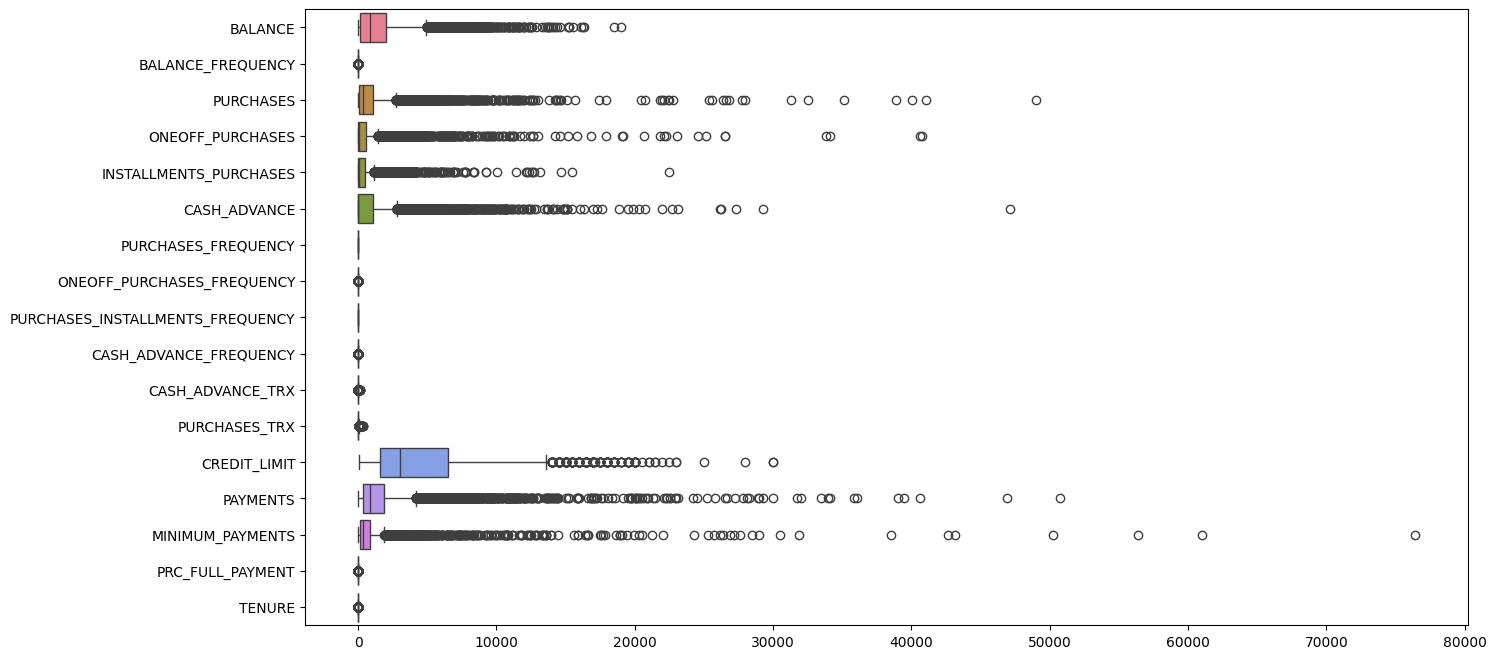

<Figure size 640x480 with 0 Axes>

In [110]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num, orient='h')
plt.show()
plt.savefig('Features Distribution before Transformation.jpg')

Transform the data with the PowerTransformer

In [111]:
from sklearn.preprocessing import PowerTransformer

def scale_features(X):
  data = X.copy()
  pt = PowerTransformer(method='yeo-johnson')
  data = pt.fit_transform(data)
  return data

In [112]:
df_num = pd.DataFrame(scale_features(df_num), columns=df_num.columns)
df_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425364,-0.983876,-0.849237,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924151,1.285321,0.877661,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012134,-0.291722,0.435065,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012134,-2.782085,0.700539,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215737,-0.231669,-0.361555,-0.677889,0.422252


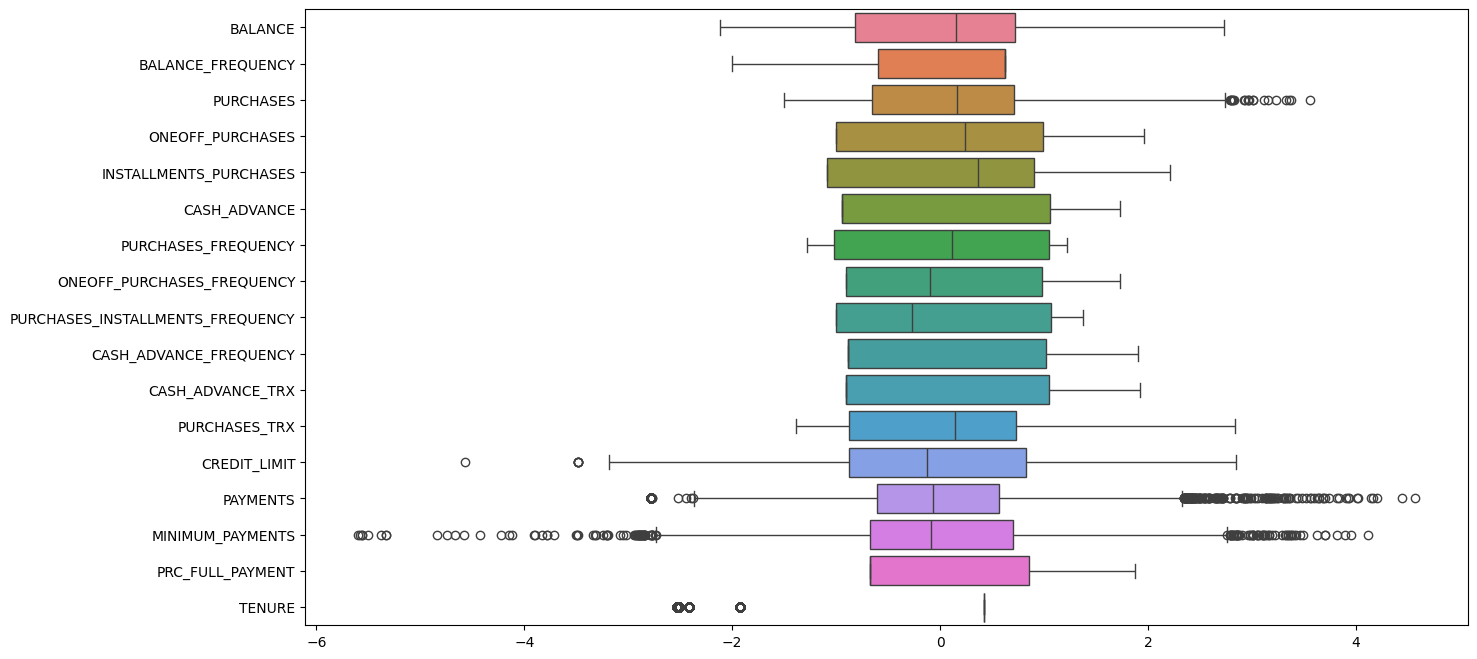

<Figure size 640x480 with 0 Axes>

In [113]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_num, orient='h')
plt.show()
plt.savefig('Features Distribution after Transformation.jpg')

# Feed the Data into the Cluster Models

## KMeans Clustering

In [114]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_range = 18
inertia = []

for k in range(2, max_range):
    kmeans = KMeans(n_clusters=k, init='k-means++', algorithm='elkan')
    model = kmeans.fit(df_num)
    print(f"Silhouette Score for K = {k}:  {silhouette_score(df_num, model.labels_)}")
    inertia.append(kmeans.inertia_)

Silhouette Score for K = 2:  0.2617196550485116
Silhouette Score for K = 3:  0.23635740058153848
Silhouette Score for K = 4:  0.24033012711777518
Silhouette Score for K = 5:  0.2423837270300096
Silhouette Score for K = 6:  0.23110251731493045
Silhouette Score for K = 7:  0.20691805026920596
Silhouette Score for K = 8:  0.18560367460857016
Silhouette Score for K = 9:  0.2070353960278157
Silhouette Score for K = 10:  0.18604913184036262
Silhouette Score for K = 11:  0.2080856648417552
Silhouette Score for K = 12:  0.1893711903302271
Silhouette Score for K = 13:  0.19840730033796458
Silhouette Score for K = 14:  0.1967598576640598
Silhouette Score for K = 15:  0.1962963187319794
Silhouette Score for K = 16:  0.19868345008629623
Silhouette Score for K = 17:  0.18576711499117543


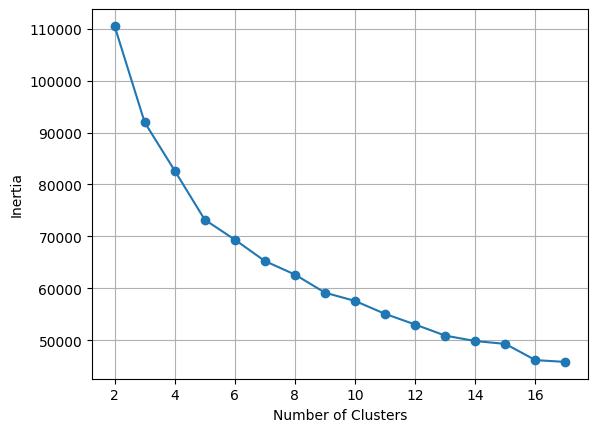

<Figure size 640x480 with 0 Axes>

In [115]:
plt.plot(range(2, max_range), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.savefig('Inertia Plot for Elbow Method.jpg')

From the WCSS, using the elbow method, the ideal number of cluster is k=3, 4, 5

In [116]:
kmeans = KMeans(n_clusters=3, random_state = 42)
model_kmeans = kmeans.fit(df_num)
model_kmeans.labels_

array([1, 2, 0, ..., 1, 2, 1], dtype=int32)

Plot the reduced dataset and their respective clusters

In [117]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_num)

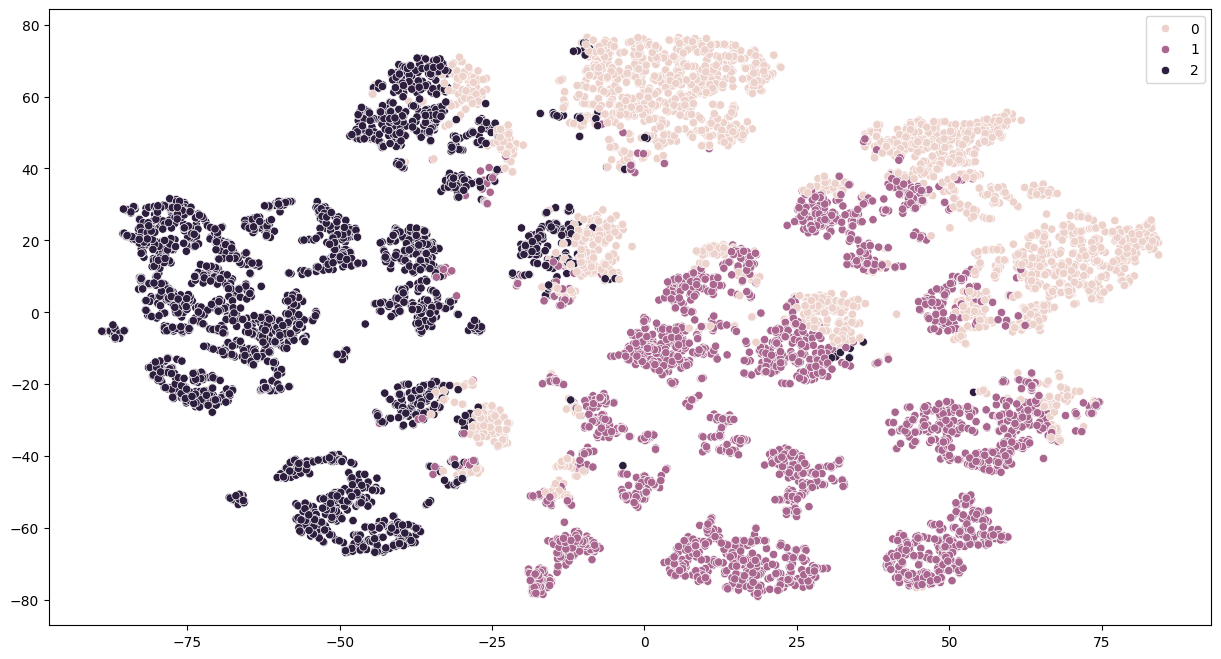

<Figure size 640x480 with 0 Axes>

In [118]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=model_kmeans.labels_)
plt.show()
plt.savefig('Plot Kmeans Reduced Using the TSNE.jpg')

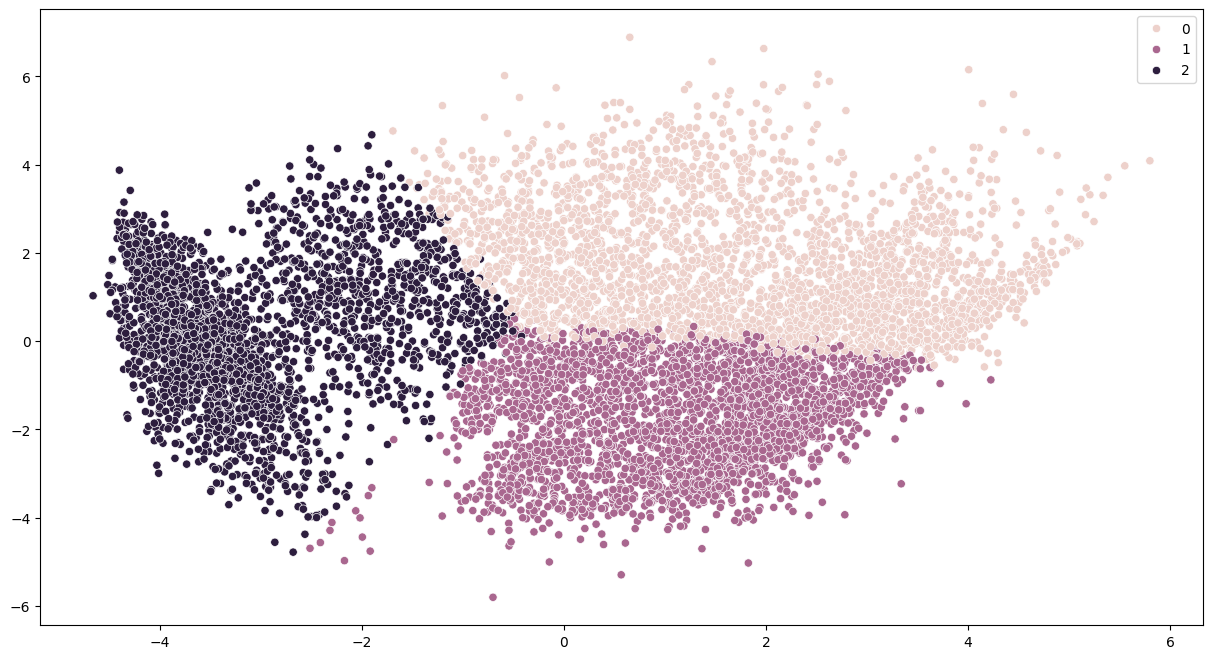

<Figure size 640x480 with 0 Axes>

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_num)

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_kmeans.labels_)
plt.show()
plt.savefig('Plot KMeans Reduced Using PCA.jpg')

## DBSCAN Clustering

In [120]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

model_dbscan = dbscan.fit(df_num)
model_dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

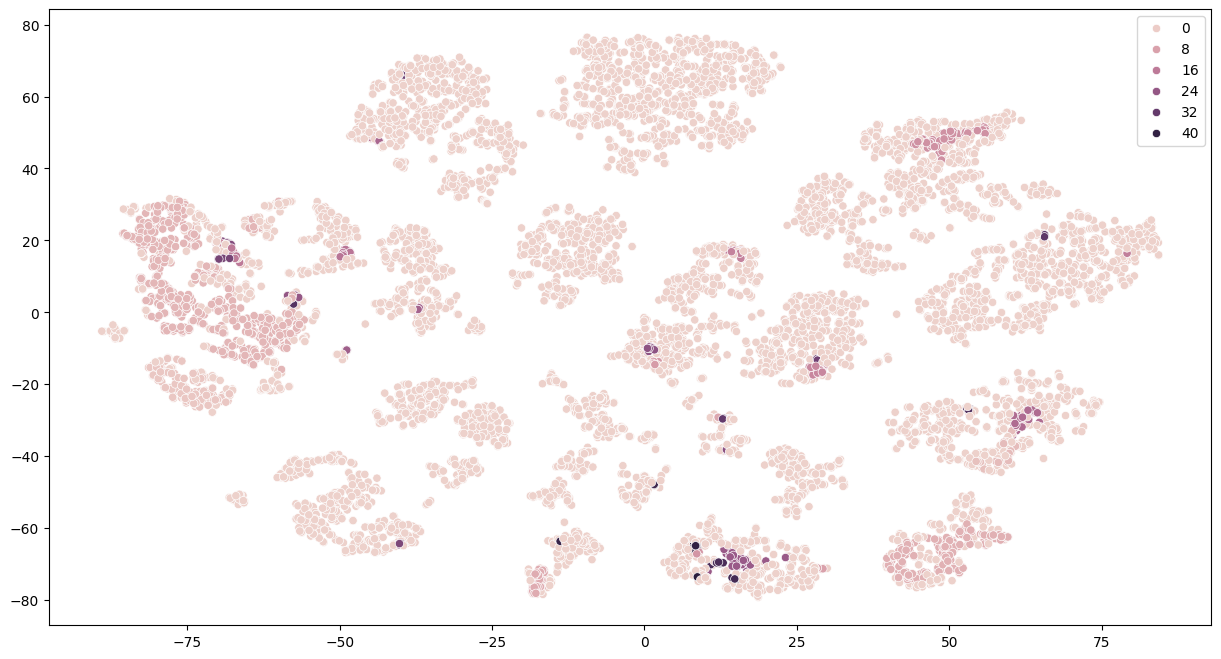

<Figure size 640x480 with 0 Axes>

In [121]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_num)

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=model_dbscan.labels_)
plt.show()
plt.savefig('Plot DBScan Using Reduced using TSNE.jpg')

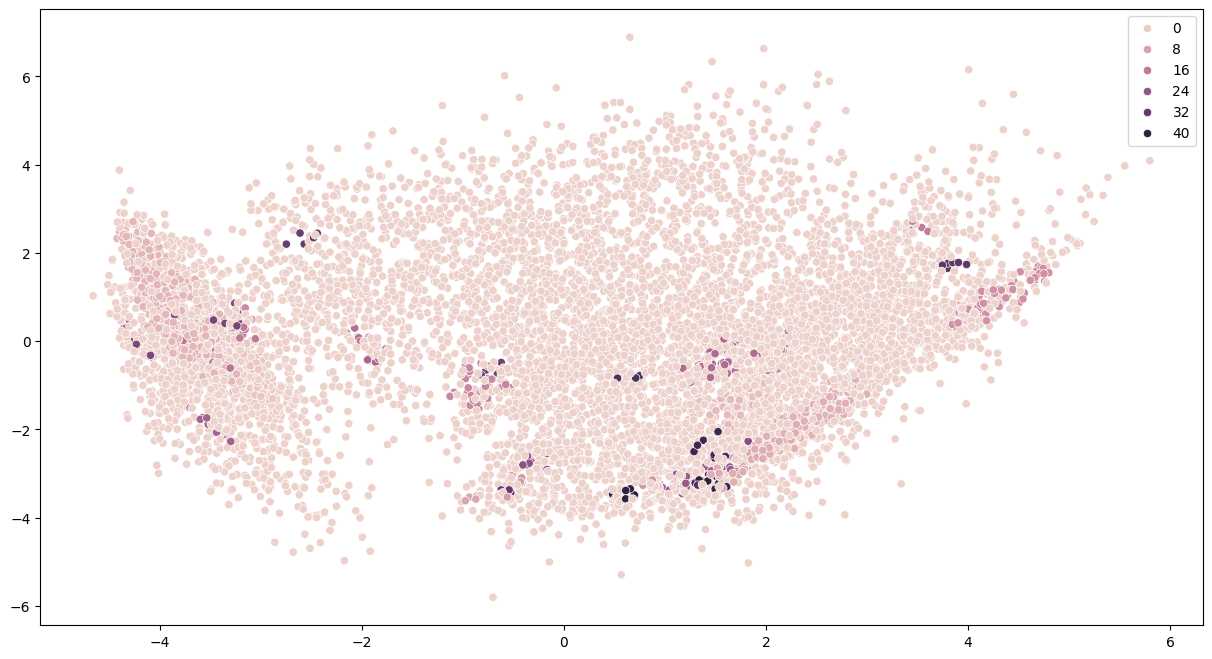

<Figure size 640x480 with 0 Axes>

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_num)

plt.figure(figsize=(15, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_dbscan.labels_)
plt.show()
plt.savefig('Plot DBScan Using Reduced using TSNE.jpg')

## Hierarchical Agglomerative Clustering


In [123]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, metric='euclidean')

model_agg = agg.fit(df_num)
model_agg.labels_


array([0, 2, 0, ..., 0, 2, 1])

Plot the dendogram

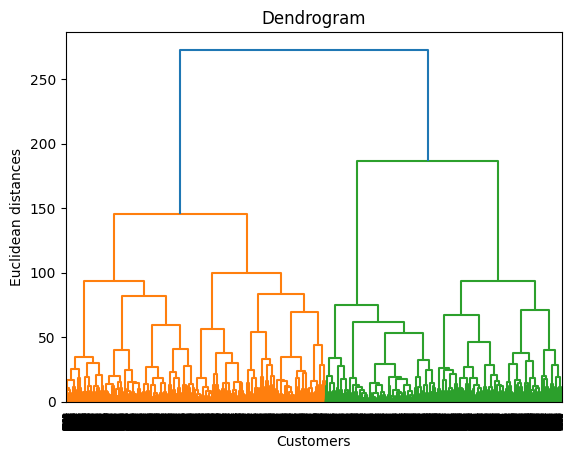

<Figure size 640x480 with 0 Axes>

In [124]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df_num, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.savefig('Dendogram of Agglomerative Clustering.jpg')